<a href="https://colab.research.google.com/github/Bobrinik/learning_ml/blob/master/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
- In this notebook we are building a classifier to classify passenger as survivor or not.

## Description of datapoint fields
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Data analysis
- We want to explore data to find features that we might use for classifying passengers.

In [21]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [22]:
!cd /gdrive/My\ Drive/

In [23]:
pip install plotly==4.6.0

In [24]:
import pandas as pd
import seaborn as sns

In [25]:
df = pd.read_csv('My Drive/machine_learning_portfolio/titanic_survival/train.csv')
gender_submission = pd.read_csv('My Drive/machine_learning_portfolio/titanic_survival/gender_submission.csv')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Features to check
- Pclass
- Age
- Name
- Sex
- Parch
- Ticket
- Fare
- Cabin

### Age

In [28]:
# What percentage of ppl survived by each age

# ax = df.Age.plot.hist(bins=80, alpha=0.5);
# df[df.Survived == 0].Age.plot.hist(bins=80, color='r', alpha=0.5 , ax=ax)
# df[df.Survived == 1].Age.plot.hist(bins=80, color='g', alpha=0.5 , ax=ax)

df_survived = df[df.Survived == 1].groupby('Age').count()
df_total = df.groupby('Age').count()

In [29]:
age_df = df_survived.Survived / df_total.Survived

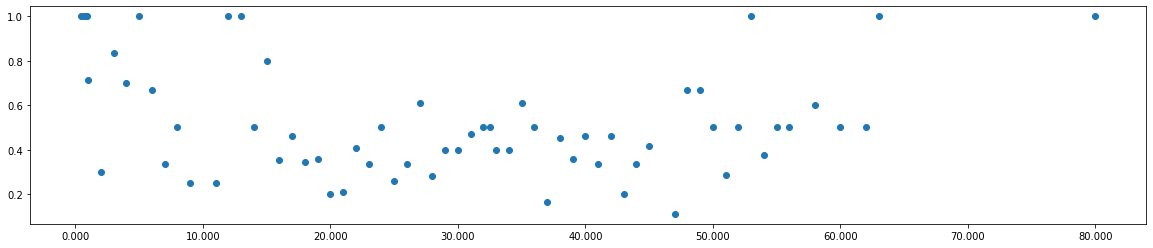

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figwidth(20)
# plt.figure(figsize=(20,10))
ax.scatter(age_df.index, age_df.values)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))

In [31]:
# sns.violinplot(x="Survived", y="Age", data=age_df, palette='muted')

#### Age observations
From the histogram we can see that there are a lot of children. That probably would not have survived without the help of adults.

Indeed, we observe that plot on the right has a fatter tail then the plot on the left meaning that there are more children that were saved than died.

## Sex
- Women and children are given higher priority, so I would assume that there were more women saved then man.

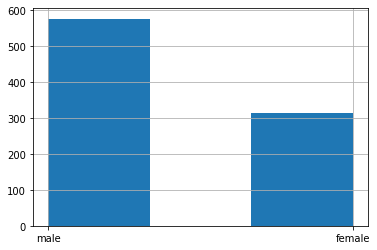

In [32]:
df.Sex.hist(bins=3);

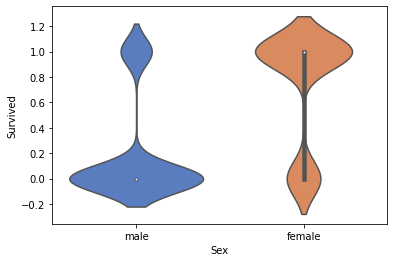

In [33]:
sns.violinplot(x="Sex", y="Survived", data=df, palette='muted');

#### Sex observations
- It's interesting to note that dispraportinately more females have been saved than males.

# Passenger class
This feature can be used as an idication of the passenger's socio-economic class.
- High socioeconomic status -- passenger['Pclass'] is 1
- Medium socioeconomic status -- passenger['Pclass'] is 2
- Low socioeconomic status -- passenger['Pclass'] is 3

### Hypothesise
I assume that people who are of higher socioeconomic status have a higher chance of survival than those of a lower class.

(0.0, 1.0)

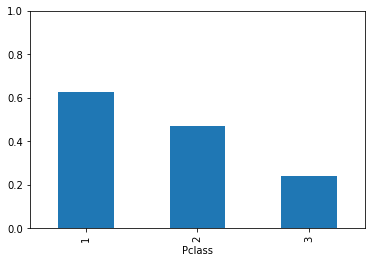

In [85]:
passenger_class_survived = df[df.Survived == 1]
passenger_class_total = df
passenger_df = passenger_class_survived.groupby('Pclass').count() / passenger_class_total.groupby('Pclass').count()
# passenger_class = df.Pclass.value_counts()
# passenger_class.plot(kind='bar', color='gray');
ax = passenger_df.PassengerId.plot.bar(x='Pclass', y='PassengerId')
ax.set_ylim(bottom=0.0, top=1.0)

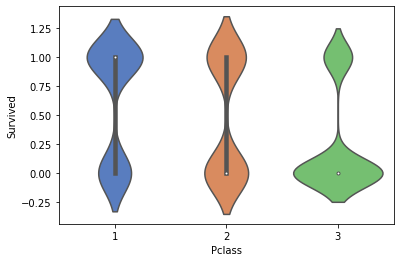

In [35]:
sns.violinplot(x="Pclass", y="Survived", data=df, palette='muted');

#### Passenger class observations
- We can see that  more people have been saved from the 1st class than from the 3rd regardless the fact that third class had a lot more people. We can also observe that second class had more or less the same amount of people saved.

## Ticket
- It would be interesting to see if there is a way to calculate a distance based on the ticket. Is it possible to tell how fart to tickets are from each other.

In [36]:
df[['Ticket', 'Survived']] # How can I vizualize this data?

,Ticket,Survived
0,A/5 21171,0
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,1
4,373450,0
...,...,...
886,211536,0
887,112053,1
888,W./C. 6607,0
889,111369,1


## Embarked
- I would assume that there is a relationship between emarkment points and the outcome.
- Embarcation points:
  - C - Cherbourgh (1st)
  - S - Southampton (2nd)
  - Q - Queenstown (3rd)

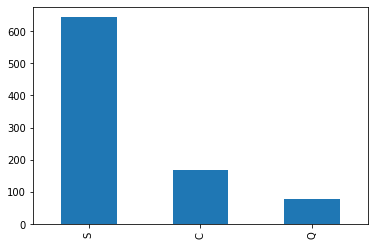

In [37]:
embarked = df.Embarked.value_counts()
embarked.plot(kind='bar');

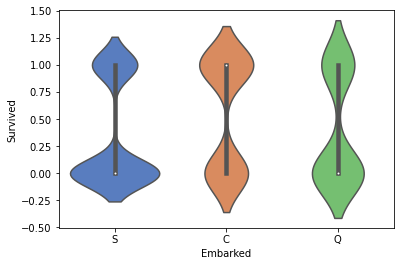

In [38]:
sns.violinplot(x="Embarked", y="Survived", data=df, palette='muted');

### Embarked points observations
- We can see that people that embarked at S had higher chance of dieing than those that embarked at C.

## Observations
### Age
- There were bunch of children on board.

### PClass
- There were more people travelling in 3rd class then in 1st and 2nd class.

### Sex
- There were more males than females.

### Embarked
- Most people embarked in S


In [39]:
survived = df.Survived.value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

In [40]:
p_survived = 342 / df.Survived.count()
# Assuming that we randomly pick a passenger
# and we don't have any extra information about him
print(f'Probability survive: {p_survived}')
print(f'Probability die:     {1 - p_survived}')

Probability survive: 0.3838383838383838
Probability die:     0.6161616161616161


## Feature searching
- What traits do the people who survived share the most?
- What traits do the people who died share the most?

inspire from-> https://www.youtube.com/watch?v=OtVR_ZnXLu4

In [41]:
# We grouop by survived because that's what we are interested in
# We want to know what characteristic people that survived have in common
# How do I learn about that? I need to cluster to see if something comes up?
# What do I cluster on?
# Do violing plot of features in one graph so that I can tell if they are on the same scale.
# How do I make sure that features have the same scale?

In [42]:
import seaborn as sns

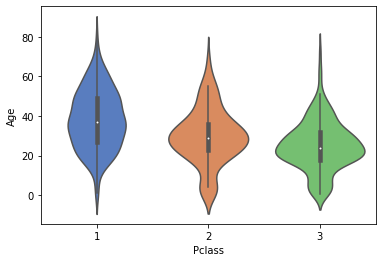

In [43]:
# data = df.Age.value_counts()
sns.violinplot(x="Pclass", y="Age", data=df, palette='muted')

- Note that we have a higher percentage of children surviving. It can be observed by a fatter tail around the age. We can also see that there is a longer tail for the age of surviving for people who are older.

- Note that we see that there is a higher portion of people survivng in the first class rather than in other classes.

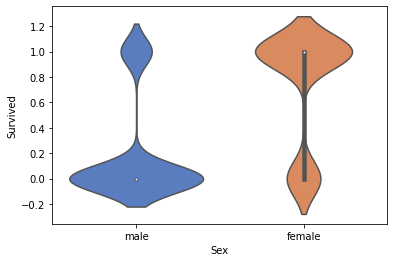

In [44]:
sns.violinplot(x="Sex", y="Survived", data=df, palette='muted')

## Cabin
- People staying in a cabin have better access to the escape boats.

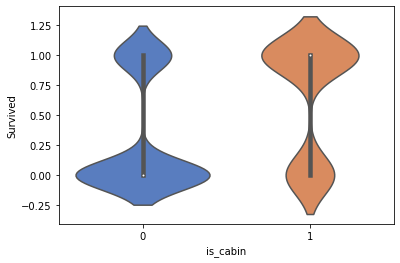

In [45]:
import numpy as np

df['is_cabin'] = df.Cabin.apply(lambda x: 1 if str == type(x) else 0)
sns.violinplot(x="is_cabin", y="Survived", data=df, palette='muted');

### Fare
- It's the money that the passenger has to pay. I would assume that passengers that have payed most of the money had better positions and thus better change of survival.

In [46]:
# sns.catplot(x="Fare", y="Survived", data=df, palette='muted');

## Ticket analysis
- From the ticket we could get extra information on the location of the passenger cabin.
- Since Titanic was hit by iceberg around 11:40PM. I assume that majority of people where in the places assigned by the ticket instead of walking around.

In [47]:
np.random.choice(df.Ticket.unique(), 20)

array(['349246', '113784', '363291', '28665', '113059', '113800',
       '3101264', '347087', '19928', '111361', '349242', '347062',
       '219533', '239853', '28220', 'STON/O 2. 3101292', '2669', '350029',
       '370377', '6563'], dtype=object)

- We can see that there are different types of tickets. Some of the tickets have letters in them which I would assume should the location or some other extra information.
- https://www.kaggle.com/c/titanic/discussion/14919#136279 <-- Check this for learning about how he did this.

## Doing tree map of categorical data

In [48]:
import plotly.express as px

fig = px.treemap(df, path=['Pclass', 'Sex', 'Parch'], values='Survived')
fig.show()

## Correlation between numerical values

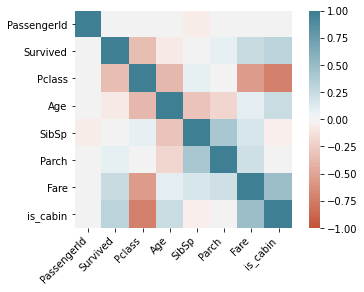

In [49]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- We notice that there is a corellation between `Pclass`, `Age`, and `Parch`
- Note:
  - Correlation is done between numerical values. Meanwhile, violin plot works well for categorical data distributions.

## ML
- We are going to apply Logistic regression to get the probability that given passenger is going to survive or no.

In [50]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
# df['Sex'] = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
df.dropna(axis='columns')

# For now let's discard 177 records
# df = df[~np.isnan(df.Age)]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,is_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,1


In [51]:
train_x, validate_x, train_y, validate_y = model_selection.train_test_split(df[['Fare', 'Pclass', 'Sex']], df[['Survived']], test_size=0.2)

In [52]:
model = LogisticRegression()
model.fit(train_x, train_y)
# validate_x

ValueError: ignored

In [ ]:
predicted = model.predict(validate_x)

In [ ]:
from sklearn.metrics import classification_report 

In [ ]:
print(classification_report(validate_y, predicted))

In [ ]:
print(classification_report(validate_y, predicted))

In [ ]:
print(classification_report(validate_y, predicted))